In [110]:
import warnings
warnings.filterwarnings("ignore")

### Read the data

In [111]:
#read the data.
%pylab inline
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

Populating the interactive namespace from numpy and matplotlib


### Choose features and variable objective

In [112]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

###  Example of how works

In [113]:
# 1 - Cargar la librería
from sklearn.linear_model import LinearRegression

In [114]:
# 2 - Crear una instancia
reg = LinearRegression()

In [115]:
# 3 - Entrenar el modelo
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
# 4 - Predicción
reg.predict([ [1000],[3000] ])

array([ 50217.33439988, 217799.90852957])

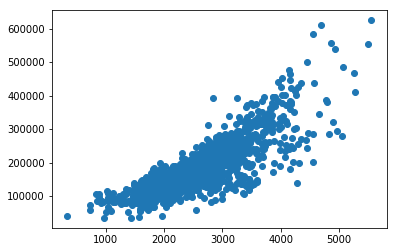

In [117]:
plt.scatter(X,y)

In [118]:
#Hypothetic size for houses
x_hip = np.linspace(500,6000)

In [119]:
x_hip

array([ 500.        ,  612.24489796,  724.48979592,  836.73469388,
        948.97959184, 1061.2244898 , 1173.46938776, 1285.71428571,
       1397.95918367, 1510.20408163, 1622.44897959, 1734.69387755,
       1846.93877551, 1959.18367347, 2071.42857143, 2183.67346939,
       2295.91836735, 2408.16326531, 2520.40816327, 2632.65306122,
       2744.89795918, 2857.14285714, 2969.3877551 , 3081.63265306,
       3193.87755102, 3306.12244898, 3418.36734694, 3530.6122449 ,
       3642.85714286, 3755.10204082, 3867.34693878, 3979.59183673,
       4091.83673469, 4204.08163265, 4316.32653061, 4428.57142857,
       4540.81632653, 4653.06122449, 4765.30612245, 4877.55102041,
       4989.79591837, 5102.04081633, 5214.28571429, 5326.53061224,
       5438.7755102 , 5551.02040816, 5663.26530612, 5775.51020408,
       5887.75510204, 6000.        ])

In [120]:
#predictions for those hypothetic sizes
predicciones = reg.predict(pd.DataFrame(x_hip))

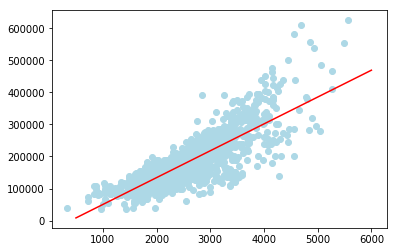

In [121]:
plt.scatter(X,y,c="lightblue")
plt.plot(x_hip,predicciones,c="red")

In [122]:
reg.coef_

array([83.79128706])

In [123]:
reg.intercept_

-33573.952664961456

### Train the model and give predictions

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [125]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
predicciones = reg.predict(X_test)

In [127]:
predicciones[:5]

array([158473.36539198, 154229.91172765, 188347.27918884, 115869.09060213,
       151174.62508934])

In [128]:
y_test[:5]

790    160200
897    142953
399    241000
303    149900
714    130500
Name: SalePrice, dtype: int64

### Evaluate my Model with metrics

In [129]:
from sklearn.metrics import mean_absolute_error

In [130]:
#MAE
mean_absolute_error(reg.predict(X_test),y_test)

31025.7023237319

In [131]:
#MAPE (% error)
np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)

0.201967523292126

### Changing my Model

In [132]:
# 1 - Cargar librería
from sklearn.neighbors import KNeighborsRegressor

In [133]:
# 2 - Crear instancia
reg = KNeighborsRegressor(n_neighbors=20)
#K=20

In [134]:
# Fit
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

### Evaluate my new Model

In [135]:
#MAE
mean_absolute_error(reg.predict(X_test),y_test)

30981.00034246575

In [136]:
#MAPE
np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)

0.19509852170787745

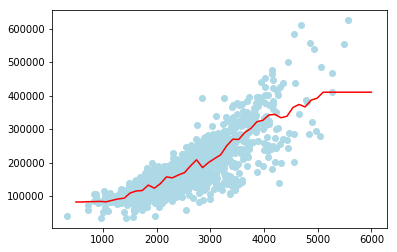

In [137]:
plt.scatter(X,y,c="lightblue")
plt.plot(x_hip,reg.predict(pd.DataFrame(x_hip)),c="red")

In [138]:
#new form to evaluate my model.
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(reg.predict(X_test),y_test))

43980.08436284966

In [139]:
from sklearn.linear_model import LinearRegression
regl = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
regk = KNeighborsRegressor(n_neighbors=5)

In [140]:
#cross validation to evaluate my models.
from sklearn.model_selection import cross_val_score

In [141]:
#evakluate my linear regression model.
cross_val_score(regl,X,y,cv=10,scoring='neg_mean_squared_error').mean()

-1883601785.1598828

In [142]:
cross_val_score(regk,X,y,cv=10,scoring='neg_mean_squared_error').mean()

-2104283516.0475783

In [143]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

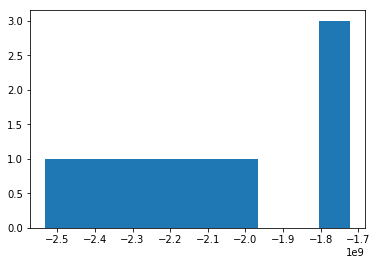

In [144]:
res = cross_val_score(regk,X,y,cv=10,scoring='neg_mean_squared_error')
plt.hist(res);

In [145]:
from sklearn.neighbors import KNeighborsRegressor
res = []
for n in np.arange(2,30):
    regk = KNeighborsRegressor(n_neighbors=n)
    res.append(cross_val_score(regk,X,y,cv=10,scoring='neg_mean_squared_error').mean())

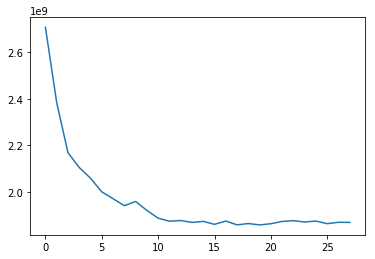

In [146]:
plt.plot(-np.array(res))

In [147]:
# El numero optimmo es 11

In [148]:
#GridSearch to find good parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

reg = GridSearchCV(KNeighborsRegressor(),
                   param_grid={"n_neighbors":np.arange(2,50)})

reg.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
reg.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=25, p=2,
          weights='uniform')

### Changing My model

In [150]:
# 1 - Importar libreríoa librería 
from sklearn.tree import DecisionTreeRegressor

In [151]:
# 2 - Crear instancia
regd = DecisionTreeRegressor(min_samples_leaf=100)

In [152]:
# 3 - Entrenar modelo
regd.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [153]:
cross_val_score(regd,X,y,scoring='neg_mean_squared_error').mean()

-2057088643.656269

In [154]:
def corr(preds,real):
    return np.corrcoef(preds,real)[0][1]

In [155]:
corr(regd.predict(X_test),y_test)

0.7306368684656485

In [156]:
from sklearn.metrics import make_scorer
cross_val_score(regd,X,y,scoring=make_scorer(corr))

array([0.82330334, 0.8116375 , 0.77714053])

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

reg = GridSearchCV(DecisionTreeRegressor(),
                   param_grid={"max_depth":np.arange(3,10)})

reg.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [158]:
reg.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

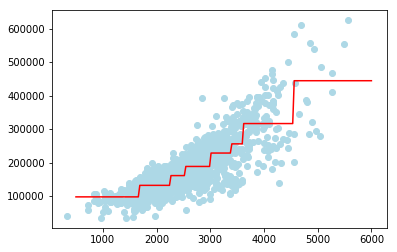

In [159]:
plt.scatter(X,y,c="lightblue")
x_hip = np.linspace(500,6000,200)
plt.plot(x_hip,reg.predict(pd.DataFrame(x_hip)),c="red")

In [160]:
np.arange(20,1000,100)

array([ 20, 120, 220, 320, 420, 520, 620, 720, 820, 920])

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

reg = GridSearchCV(DecisionTreeRegressor(),
                   param_grid={"min_samples_leaf":np.arange(20,1000,100),
                               "max_depth":np.arange(3,10)
                               }
                   ,
                   )

reg.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([ 20, 120, 220, 320, 420, 520, 620, 720, 820, 920]), 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [162]:
reg.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

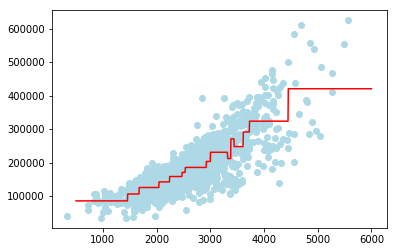

In [163]:
x_hip = np.linspace(500,6000,1000)
plt.scatter(X,y,c="lightblue")
plt.plot(x_hip,reg.predict(pd.DataFrame(x_hip)),c="red")

In [164]:
regl = LinearRegression()
regl.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

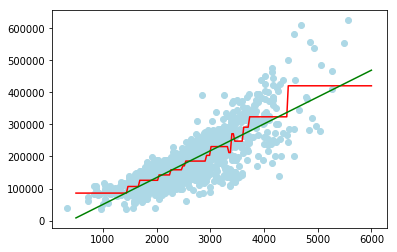

In [165]:
x_hip = np.linspace(500,6000,200)
plt.scatter(X,y,c="lightblue")
plt.plot(x_hip,reg.predict(pd.DataFrame(x_hip)),c="red")
plt.plot(x_hip,regl.predict(pd.DataFrame(x_hip)),c="green")

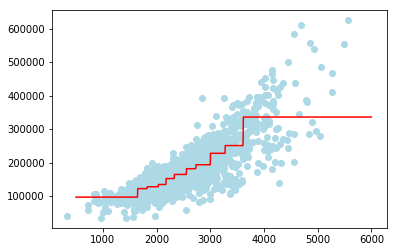

In [166]:

regd = DecisionTreeRegressor(min_samples_leaf=100)
regd.fit(X_train,y_train)
x_hip = np.linspace(500,6000,1000)
plt.scatter(X,y,c="lightblue")
plt.plot(x_hip,regd.predict(pd.DataFrame(x_hip)),c="red")

In [167]:
np.sqrt(-cross_val_score(regd,X,y,scoring="neg_mean_squared_error").mean())

45355.139109656244

In [168]:
from tqdm import tqdm_notebook as tqdm


In [169]:
res = []
for m in  tqdm(np.arange(5,200,2)):
    regd = DecisionTreeRegressor(min_samples_leaf=m)
    regd.fit(X_train,y_train)
    r = np.sqrt(-cross_val_score(regd,X,y,scoring="neg_mean_squared_error").mean())
    res.append(r)

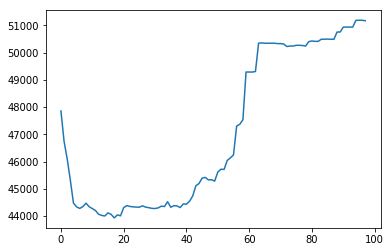

In [170]:
plt.plot(res)

## END